# DSI7 - Group 1

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv


Team Members: 
    - Rawan Almalki 
    - Rayan Raad
    - Ghalib Tawfiq

The titanic is one of the most famous ships to ever sail the oceans. The ship was sailing through the atlantic ocean when it hit an iceberg and sunk on April 15, 1912. It is considered to be one of the famouse tragedies in history as approximately 68 % of people on it died, icluding passengers and crew members. Today we will explore some of the factories that might have attributed to the survival of the people that were on board.

## Here we import the libarey and the Dataframe

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV

# To ignore unwanted warnings
import warnings
warnings.filterwarnings('ignore')

train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')
submission = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')

# Reading Data from CSV to DF - Jupyter
# train = pd.read_csv('data/train.csv')
# test = pd.read_csv('data/test.csv')
# submission = pd.read_csv('data/gender_submission.csv')

## The Dataframe Description
|Feature|Type|Dataset|Description|
|---|---|---|---|
|PassengerId|int64|Train-Test|Passenger ID|
|Name|object|Train-Test|Name|
|survival|int64|Train-Test|Survival (0 = No, 1 = Yes)|
|pclass|int64|Train-Test|Ticket class(1 = 1st, 2 = 2nd, 3 = 3rd)|
|sex|object|Train-Test|Sex|
|Age|float64|Train-Test|Age in years|
|sibsp|int64|Train-Test|# of siblings / spouses aboard the Titanic|
|parch|int64|Train-Test|# of parents / children aboard the Titanic|
|ticket|object|Train-Test|Ticket number|
|fare|float64|Train-Test|Passenger fare|
|cabin|object|Train-Test|Cabin number|
|embarked|object|Train-Test|Port of Embarkation(C = Cherbourg, Q = Queenstown, S = Southampton)|

## here we want to see the null values

- We will start by plotting a heatmap of missing values for both datasets

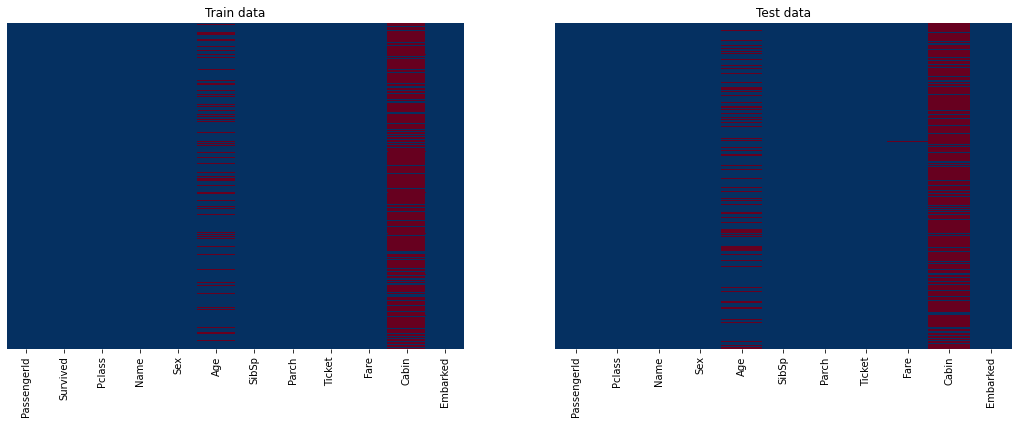

In [3]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 6))

# train data 
sns.heatmap(train.isnull(), yticklabels=False, ax = ax[0], cbar=False, cmap='RdBu_r')
ax[0].set_title('Train data')

# test data
sns.heatmap(test.isnull(), yticklabels=False, ax = ax[1], cbar=False, cmap='RdBu_r')
ax[1].set_title('Test data');

We noticed that both dataframes contain missing data.
- The train DF have missing data in Age,Cabin and Embarked features.
- The test DF have missing data in Age,Cabin and Fare features.

In [4]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## as we can see we alot of missing  data in Age , Cabin and Embarked

- Approximatly 78 % of cabin data is missing which might greatly affect our predictions of survival

In [6]:
#print number of females vs. males that survive
print("females who survived:", train["Survived"][train["Sex"] == 'female'].value_counts())

print(" males who survived:", train["Survived"][train["Sex"] == 'male'].value_counts())

females who survived: 1    233
0     81
Name: Survived, dtype: int64
 males who survived: 0    468
1    109
Name: Survived, dtype: int64


- A quick look at the survival infor based on Sex

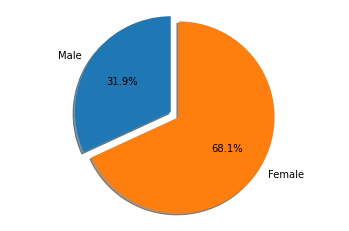

In [7]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Male', 'Female'
sizes = [109, 233]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

 - As we can see,the percent of female survivors is higher than male.

# Survival based on class

<function matplotlib.pyplot.show(*args, **kw)>

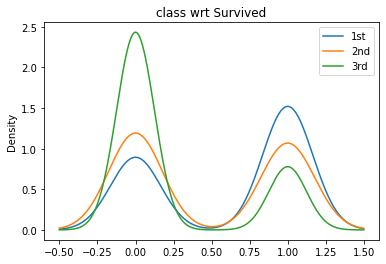

In [8]:
for x in [1,2,3]:
    train.Survived[train.Pclass == x].plot(kind="kde")
plt.title("class wrt Survived")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.legend(("1st","2nd","3rd"))

plt.show

- We can see that the 2nd class is almost devivded 50/50 between survivng and not. While the 1st class have the higest survival rate and 3rd have the lowest

# Many passengers had families with them

Text(0.5, 1.0, 'Parch Distribution by survived')

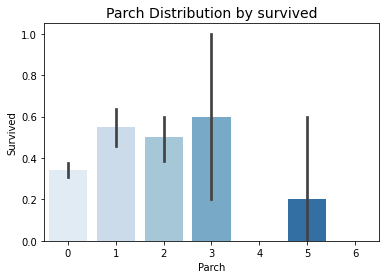

In [9]:
sns.barplot(x="Parch", y="Survived", data=train,palette="Blues")
plt.title('Parch Distribution by survived', fontsize=14)

- The plot show us the number of total passengers that have parents or children. So, we noticed that families have chance to survive more than the single.

# General plots to get more info 

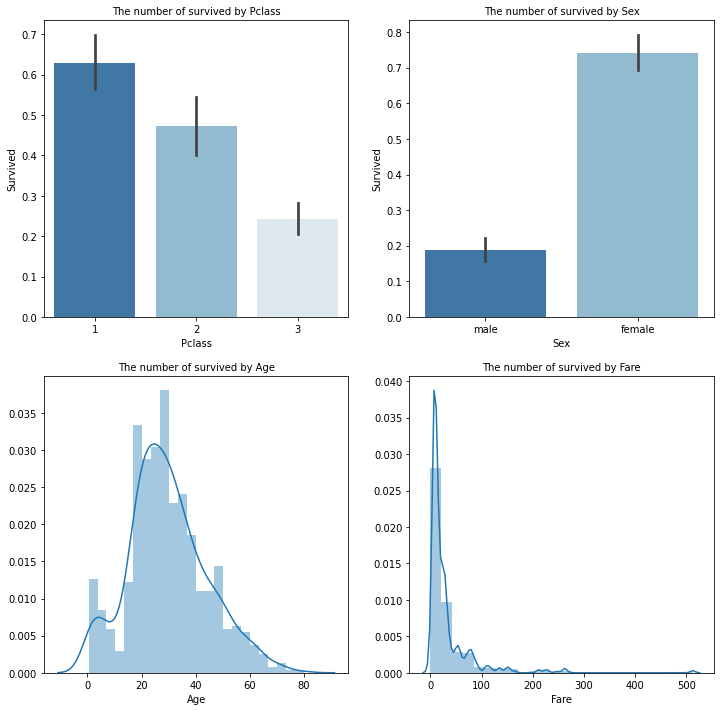

In [10]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(12, 12))
sns.set_palette(sns.color_palette(('RdBu_r')))
sns.barplot(train[ 'Pclass'], train['Survived'], ax=ax[0,0])
sns.barplot(train['Sex'], train[ 'Survived'], ax=ax[0,1]) 
sns.distplot(train['Age'],bins=24,ax=ax[1,0])
sns.distplot(train['Fare'],bins=24, ax=ax[1,1])
ax[0,0].set_title('The number of survived by Pclass', fontsize=10)
ax[0,1].set_title('The number of survived by Sex', fontsize=10)
ax[1,0].set_title('The number of survived by Age', fontsize=10)
ax[1,1].set_title('The number of survived by Fare', fontsize=10)
plt.show()

As we can see, the  plots shows:
- The number of first Pclass survivors is higher than the second and third Pclass.
- The number of female survivors is higher than male.
- The plot showed us a peak between the ages of 0 and 5 for infants and children. Also, showed a peak in the number of survivors between the ages of 20 and 40 years.
- The Fare showed a positively skewed.

As we can see above how many Survived by (sex , age , fare  and pclass)

## Now let's start looking at missing data

In [11]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [12]:
test.Embarked.value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

## We remove Survived column form Train so we can merge

In [13]:
y = train['Survived']
train.drop('Survived', axis=1, inplace=True)
train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
test.set_index('PassengerId',inplace=True)
train.set_index('PassengerId',inplace=True)

In [15]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


- Merging train and test data in preperation for cleaning

In [16]:
data_merge = pd.merge(train ,test,how='outer',left_index=False, right_index=False)

In [17]:
data_merge.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- We will try to group families using last name to get an idea of families that survived this tragic incident 

In [18]:
# Split the name column to two different columns (last_name & title)
data_merge['last_name'] = data_merge['Name'].apply(lambda x: x.split(',')[0])
data_merge['title'] = data_merge['Name'].apply(lambda x: x.split('.')[0].split(',')[1])

# We will also add parch and sibsp to get total of family memebers 
data_merge['family_size'] = data_merge['SibSp'] + data_merge['Parch'] + 1

- Filling Embarked columns with the mode of the column

In [19]:
data_merge['Embarked'] = data_merge['Embarked'].fillna('S')

- Filling fare column with the average based on class, parch and sibsp

In [20]:
data_merge['Fare'] = data_merge['Fare'].fillna(data_merge.groupby(['Pclass', 'Parch', 'SibSp']).Fare.median()[3][0][0])

- Filling the age column with the median based on sex and class

In [21]:
data_merge['Age'] = data_merge.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

- Creating 6 different age groups to be apple to characterize them 

In [22]:
bins = [0, 5, 13, 19, 30, 60, 80]
labels = ['Baby', 'Child', 'Teenager', 'Young Adult', 'Adult', 'Senior']
data_merge['AgeGroup'] = pd.cut(data_merge["Age"], bins, labels = labels)

- Dropping unnecessary columns after creating features from them 

In [23]:
data_merge.drop('Age', axis = 1, inplace=True)

In [24]:
data_merge.drop('Name', axis=1, inplace=True)

In [25]:
data_merge.drop('SibSp', axis = 1, inplace=True)
data_merge.drop('Parch', axis = 1, inplace=True)

- Cabin data is missing 77.6 % of its data, it does not make sense to fill it with the mode ofe the column 
- We decided that since this is a large group, could be characterized a separate cabin group

In [26]:
data_merge['Cabin'] = data_merge['Cabin'].fillna('M')

- Plotting a heatmap to check missing data after cleaning 

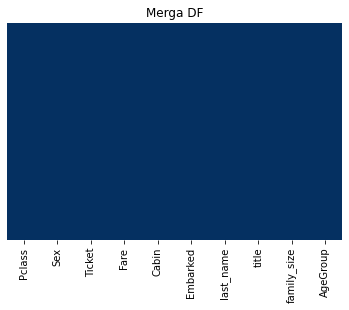

In [27]:
ax = plt.axes()
sns.heatmap(data_merge.isnull(), yticklabels=False, ax = ax, cbar=False, cmap='RdBu_r')
ax.set_title('Merga DF');

- As we can see, the merge DF does not have a missing data.

- Since cabin A,B & C are exclusive for class one, and FG are for class 2 we can group them as four seperate categories 
- ABC for class 1
- DE, D shared between all groups and 
- FG are shared between class 2 and 3

In [28]:
data_merge['Cabin'] = data_merge['Cabin'].apply(lambda x: 'ABC' if x[0] in 'ABCT' else 'DE' if x[0] in 'DE' else 'FG' if x[0] in 'FG' else 'M')

In [29]:
data_merge

,Pclass,Sex,Ticket,Fare,Cabin,Embarked,last_name,title,family_size,AgeGroup
0,3,male,A/5 21171,7.2500,M,S,Braund,Mr,2,Young Adult
1,1,female,PC 17599,71.2833,ABC,C,Cumings,Mrs,2,Adult
2,3,female,STON/O2. 3101282,7.9250,M,S,Heikkinen,Miss,1,Young Adult
3,1,female,113803,53.1000,ABC,S,Futrelle,Mrs,2,Adult
4,3,male,373450,8.0500,M,S,Allen,Mr,1,Adult
...,...,...,...,...,...,...,...,...,...,...
1304,3,male,A.5. 3236,8.0500,M,S,Spector,Mr,1,Young Adult
1305,1,female,PC 17758,108.9000,ABC,C,Oliva y Ocana,Dona,1,Adult
1306,3,male,SOTON/O.Q. 3101262,7.2500,M,S,Saether,Mr,1,Adult
1307,3,male,359309,8.0500,M,S,Ware,Mr,1,Young Adult


In [30]:
# DF used for plotting only
df_plot_train = data_merge[:891].copy()
# Seperating our target in a different DF
df_plot_train['Survived'] = y
df_plot_train

,Pclass,Sex,Ticket,Fare,Cabin,Embarked,last_name,title,family_size,AgeGroup,Survived
0,3,male,A/5 21171,7.2500,M,S,Braund,Mr,2,Young Adult,0
1,1,female,PC 17599,71.2833,ABC,C,Cumings,Mrs,2,Adult,1
2,3,female,STON/O2. 3101282,7.9250,M,S,Heikkinen,Miss,1,Young Adult,1
3,1,female,113803,53.1000,ABC,S,Futrelle,Mrs,2,Adult,1
4,3,male,373450,8.0500,M,S,Allen,Mr,1,Adult,0
...,...,...,...,...,...,...,...,...,...,...,...
886,2,male,211536,13.0000,M,S,Montvila,Rev,1,Young Adult,0
887,1,female,112053,30.0000,ABC,S,Graham,Miss,1,Teenager,1
888,3,female,W./C. 6607,23.4500,M,S,Johnston,Miss,4,Young Adult,0
889,1,male,111369,30.0000,ABC,C,Behr,Mr,1,Young Adult,1


### we chang the title so it can be esay to read 

In [31]:
df_plot_train['title'] = df_plot_train['title'].apply(lambda x: x.strip(' '))
df_plot_train['title'].replace(['Miss', 'Mrs','Ms', 'Mlle', 'Lady', 'Mme', 'the Countess', 'Dona'], 'Miss/Mrs/Ms', inplace=True)
df_plot_train['title'].replace(['Dr', 'Col', 'Major', 'Jonkheer', 'Capt', 'Sir', 'Don', 'Rev'], 'Dr/Military/Noble/Clergy', inplace=True)

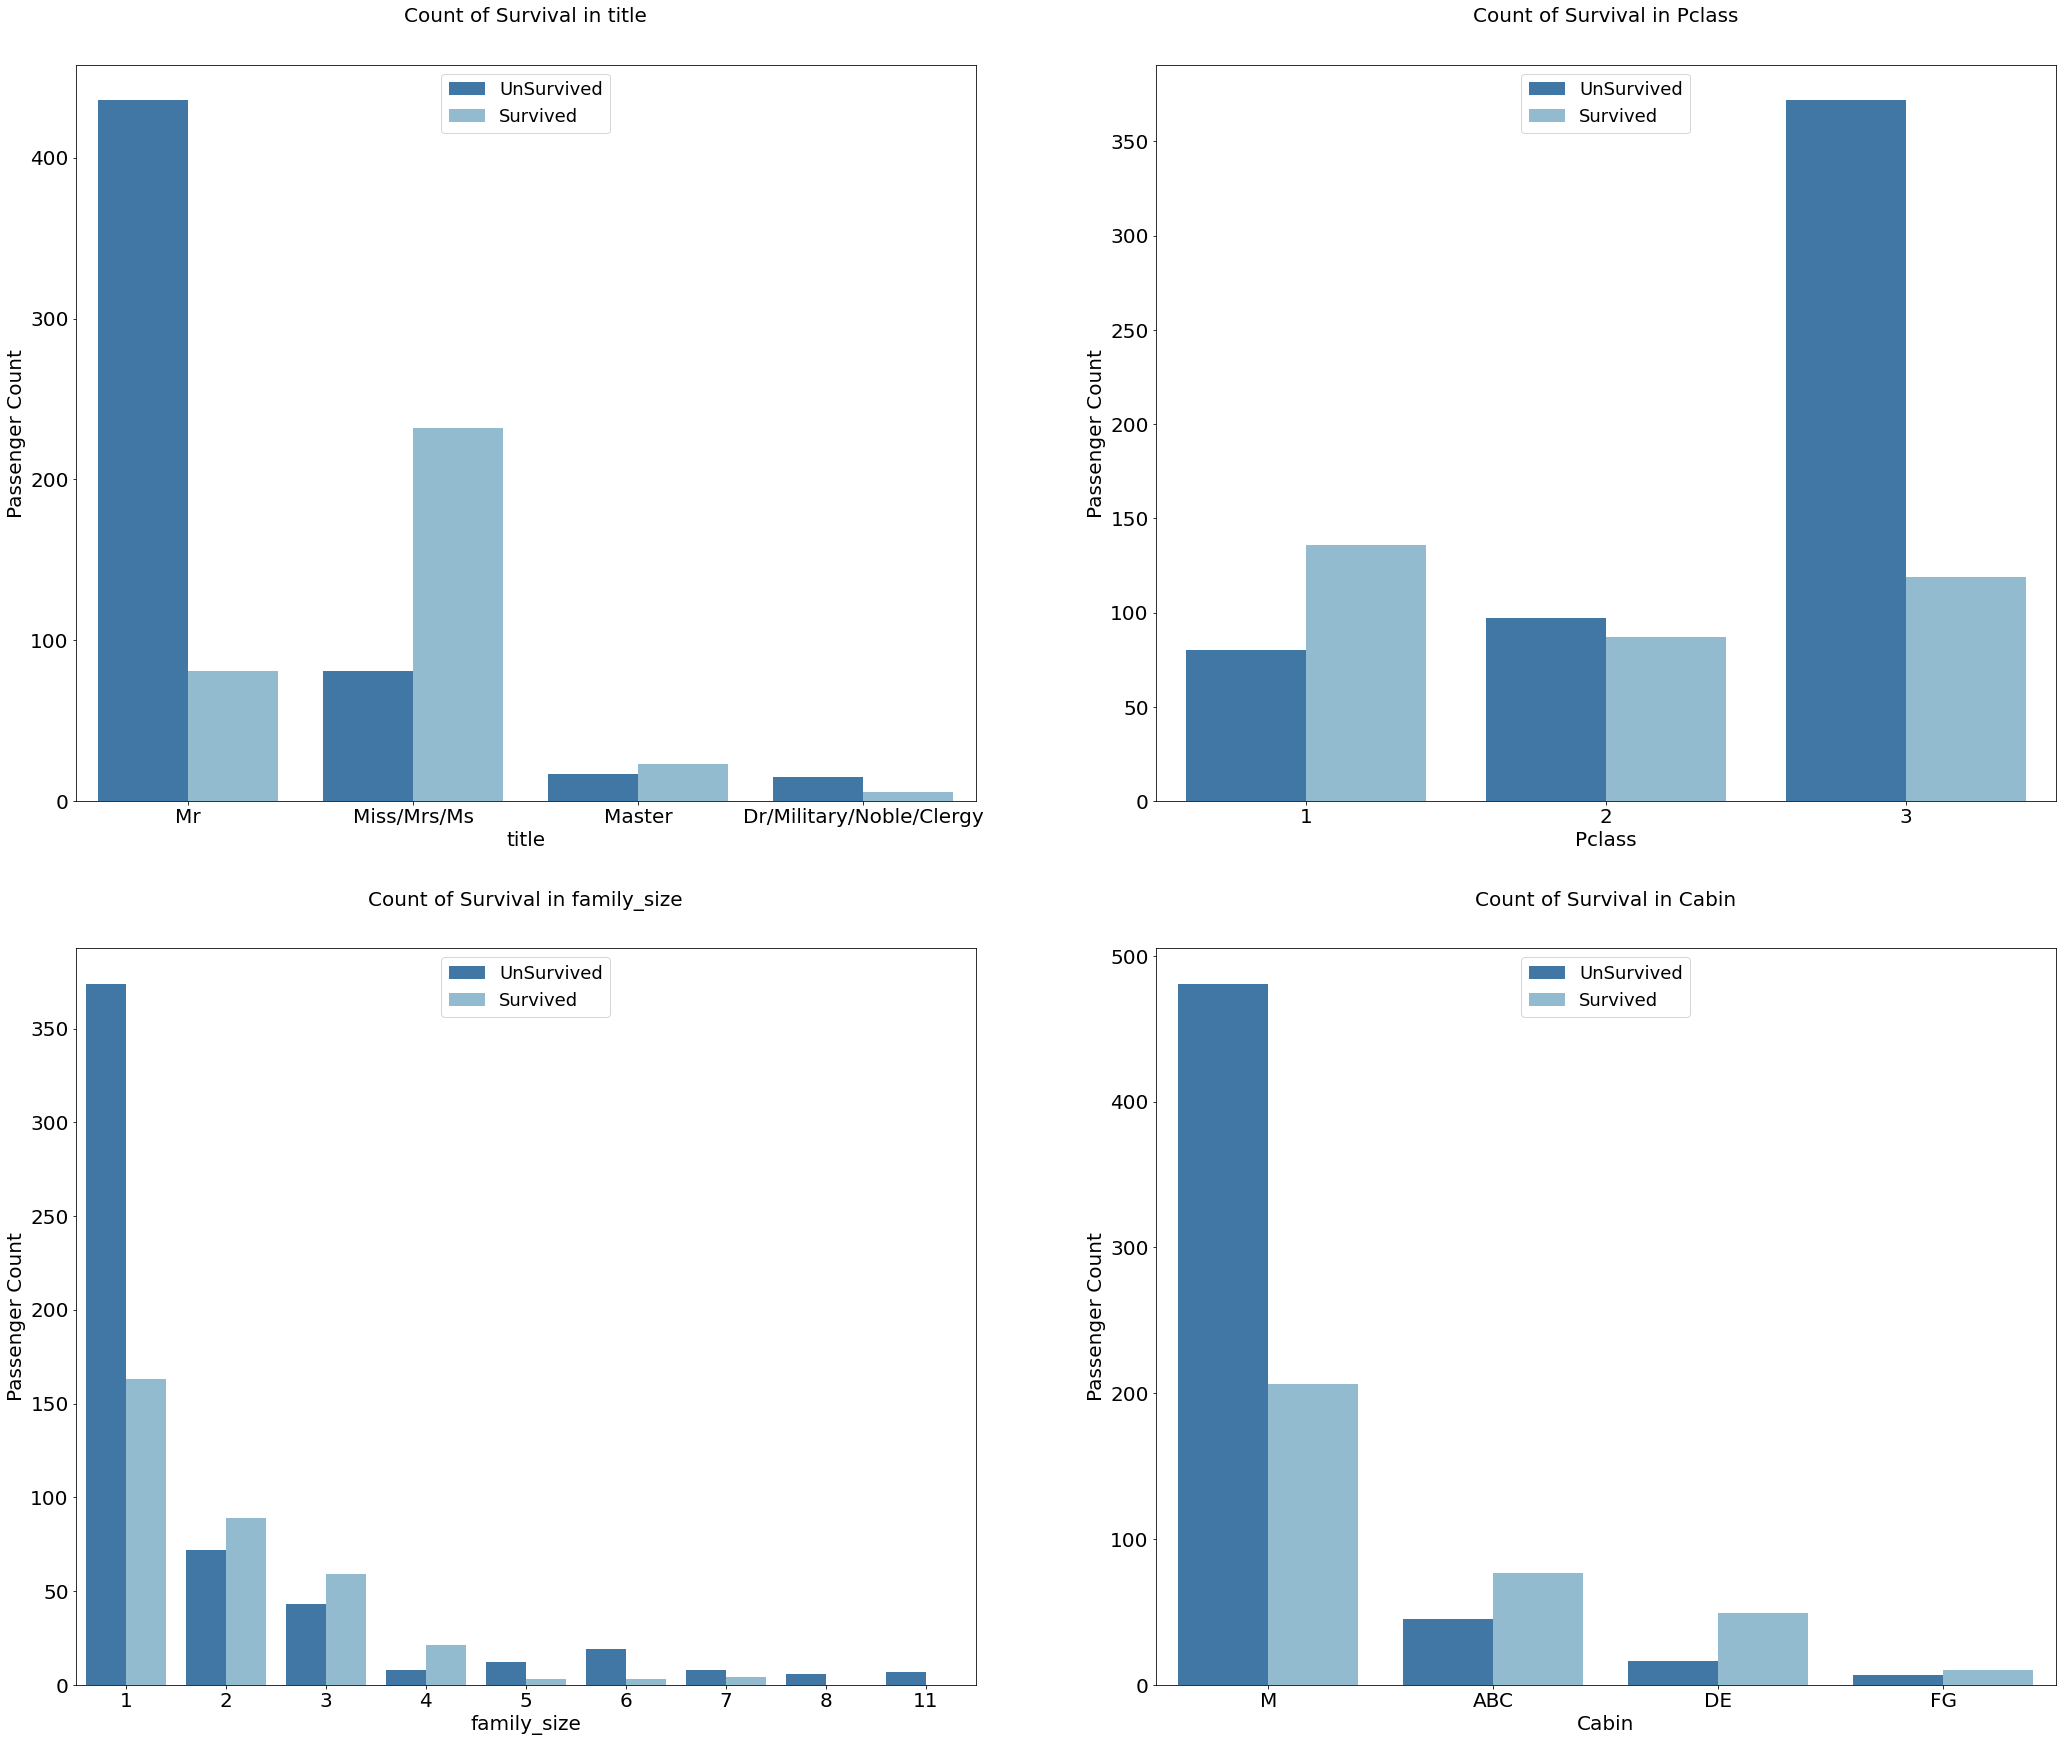

In [32]:
cat_features = ['title', 'Pclass', 'family_size','Cabin']

fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(20, 20))
plt.subplots_adjust(right=1.5, top=1.25)

for i, feature in enumerate(cat_features, 1):    
    plt.subplot(2, 2, i)
    sns.countplot(x=feature, hue='Survived', data=df_plot_train)
    
    plt.xlabel('{}'.format(feature), size=20)
    plt.ylabel('Passenger Count', size=20)    
    plt.tick_params(axis='x', labelsize=20)
    plt.tick_params(axis='y', labelsize=20)
    
    plt.legend(['UnSurvived', 'Survived'], loc='upper center', prop={'size': 18})
    plt.title('Count of Survival in {}'.format(feature), size=20, y=1.05)

plt.show()

We noticed on plots the following:
- The highest number of survivors was in 'Miss/Mrs/Ms'  group. Then, men in the 'Mr' are the highest number from another group of men.
- The number of first Pclass survivors is higher than the second and third Pclass.
- We labeled the family size with 1 as single, then (2,3) as a small family, (4,5,6) as a medium family and (7,8,11) as a big family. And the plot showed that the highest number of survivors was single people.
- The Highest number of survivors was in M Cabin.

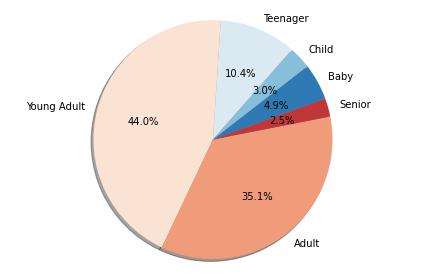

In [33]:
# Pie chart
labels = 'Baby', 'Child', 'Teenager', 'Young Adult', 'Adult', 'Senior'
sizes = [44,27,93,392,313,22]
explode = (0, 0,0,0,0,0)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=20)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

- We noticed in the plot that the percentage of adults and young adults people is the highest percentage of passengers in Titanic.

- From the ticket column and last_name column, we were able to see that some families or groups shared a similiar ticket and all had the same fair 
- While they might have had different cabins, they still were all close to each other and that might have impacted their survival rate 
- Since cabin data are missing so much cabin info, we think the columns will be of no use to us

In [34]:
data_merge.drop('Ticket', axis = 1, inplace=True)
data_merge.drop('last_name', axis = 1, inplace=True)

In [35]:
# Changing Sex from male/female to 0/1
data_merge['Sex'] = data_merge['Sex'].map({'male':0, 'female':1})

# Creating Dummies after cleaning data

In [36]:
data_merge_dummy = pd.get_dummies(data_merge, drop_first=True)

- Seperating data to train and test again

In [37]:
train_cleaned = data_merge_dummy[:891]
test_cleaned = data_merge_dummy[891:]

In [38]:
train_cleaned.tail()

,Pclass,Sex,Fare,family_size,Cabin_DE,Cabin_FG,Cabin_M,Embarked_Q,Embarked_S,title_ Col,...,title_ Mrs,title_ Ms,title_ Rev,title_ Sir,title_ the Countess,AgeGroup_Child,AgeGroup_Teenager,AgeGroup_Young Adult,AgeGroup_Adult,AgeGroup_Senior
886,2,0,13.00,1,0,0,1,0,1,0,...,0,0,1,0,0,0,0,1,0,0
887,1,1,30.00,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
888,3,1,23.45,4,0,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
889,1,0,30.00,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
890,3,0,7.75,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [39]:
test_cleaned.head()

,Pclass,Sex,Fare,family_size,Cabin_DE,Cabin_FG,Cabin_M,Embarked_Q,Embarked_S,title_ Col,...,title_ Mrs,title_ Ms,title_ Rev,title_ Sir,title_ the Countess,AgeGroup_Child,AgeGroup_Teenager,AgeGroup_Young Adult,AgeGroup_Adult,AgeGroup_Senior
891,3,0,7.8292,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
892,3,1,7.0000,2,0,0,1,0,1,0,...,1,0,0,0,0,0,0,0,1,0
893,2,0,9.6875,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
894,3,0,8.6625,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
895,3,1,12.2875,3,0,0,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0


# Modeling Section

- Seperating features into X 

In [40]:
X=train_cleaned

In [41]:
# Need to do some imports for modeling 
from IPython.display import Image  
from io import StringIO
from sklearn.tree import export_graphviz
import pydot # please install this package if you don't have it.
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn import svm
svm_m=svm.SVC()

In [42]:
# Fit Decision Trees
dt = DecisionTreeClassifier(max_depth = 6,random_state=8)
dt.fit(X,y)
# Getting model score
print('dt: ', dt.score(X,y))
# Print results 
s = cross_val_score(dt, X, y, cv=7 )
print("{} {} Score:\t{:0.3} ± {:0.3}".format("Decision Tree", "Train", s.mean().round(3), s.std().round(3)))
print()


# Fit Bagging + Decision Trees
dt_bag = BaggingClassifier(max_features =16, n_estimators = 100,random_state=8)
dt_bag.fit(X,y)
# Getting model score
print('dt_bag: ', dt_bag.score(X,y))
# Print results 
s = cross_val_score(dt_bag, X, y, cv=7)
print("{} {} Score:\t{:0.3} ± {:0.3}".format("Decision Tree", "Train", s.mean().round(3), s.std().round(3)))
print()


# Fit Random Forest
rf = RandomForestClassifier(random_state=8)
rf.fit(X,y)
# Getting model score
print('rf: ', rf.score(X,y))
# Print results 
s = cross_val_score(rf, X, y, cv=7)
print("{} {} Score:\t{:0.3} ± {:0.3}".format("Decision Tree", "Train", s.mean().round(3), s.std().round(3)))
print()


# Fit Extra Trees
dt_et = ExtraTreesClassifier(random_state=8)
dt_et.fit(X,y)
# Getting model score
print('dt_et: ', dt_et.score(X,y))
# Print results 
s = cross_val_score(dt_et, X, y, cv=7)
print("{} {} Score:\t{:0.3} ± {:0.3}".format("Decision Tree", "Train", s.mean().round(3), s.std().round(3)))

# Fit SVM
svm_m.fit(X,y)
# Getting model score
print('svm_m: ', svm_m.score(X,y))
# Print results 
s = cross_val_score(svm_m, X, y, cv=7)
print("{} {} Score:\t{:0.3} ± {:0.3}".format("svm_m", "Train", s.mean().round(3), s.std().round(3)))
print()

dt:  0.8608305274971941
Decision Tree Train Score:	0.819 ± 0.019

dt_bag:  0.9225589225589226
Decision Tree Train Score:	0.845 ± 0.022

rf:  0.9517396184062851
Decision Tree Train Score:	0.808 ± 0.018

dt_et:  0.9517396184062851
Decision Tree Train Score:	0.794 ± 0.027
svm_m:  0.6846240179573513
svm_m Train Score:	0.668 ± 0.04



- z=  1 cx =  5 max =  17 n_e=  104
- dt_bag:  0.9281705948372615
- Decision Tree Train Score:	0.845 ± 0.038


- We can see the Decision Tree Bagging Classifier is the current best model 
- We will generate predicitions based on the best model

In [43]:
bag_pred = dt_bag.predict(test_cleaned)
bag_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

- Store predicitions in the submissions survive column and save it as a csv

In [44]:
submission['Survived'] = bag_pred
# Save CSV to path
submission.to_csv('submission_dt_bag.csv', index=False)
# Jupyter save to c
# submission.to_csv('data/submission_dt_bag_best_r, index=False)

# Visual Model of our Decision Tree

In [45]:
dt_best = dt_bag.base_estimator_
dt_best.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

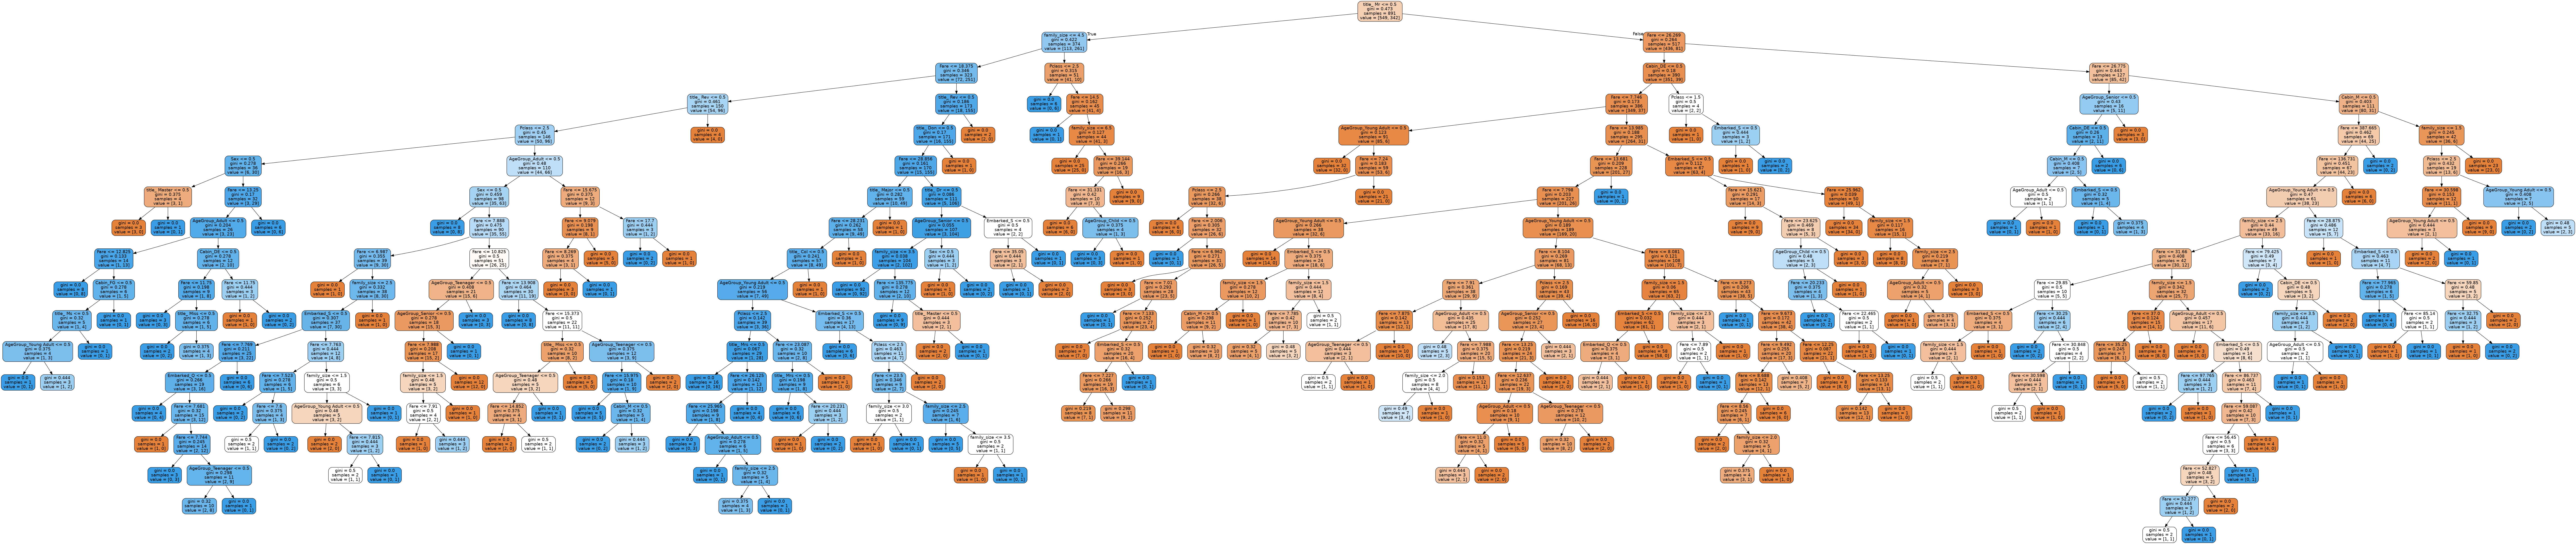

In [46]:
# Need to do some imports
from IPython.display import Image  
from io import StringIO
from sklearn.tree import export_graphviz
import pydot # please install this package if you don't have it.

dot_data = StringIO('/data/tree.dot')  
export_graphviz(decision_tree = dt_best,
                 out_file = dot_data,
                 feature_names = X.columns, 
                 filled=True, 
                 rounded=True) 

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png()) 

- If the above section did not work, please see the picture in github 

# Conclusion

The titanic happened more than a 100 years ago, yet its data still gets used to determine factors of survivel. It is unfortunate that many of the critical data that might have been helpful in increasing accurcy was lost. Cabin information based on the titanic blue print mentioned that cabin A - G have an increasing distance to the stair case leading to the top of the ship. This would have greatly impacted the survival rate of each cabin. Also some more info such as which members in the data were part of the crew and which were passengers might have added to the accuracy of our model since many of the crew were on the ship helping everyone off board to avoid the tragedy. We can see that almost 75 % of women survived the tragedy while only about 15 % of men did. From the men, most of them were childern. Between Class, Sex and Age, we were able to get an acceptiable prediction based on the data that was provied. 
I hope this was insightful and Thank you for reading

- Group 1 DSI7 